# Anomaly Detection (Anomali Tespiti)

İlk başta anomalinin tanımını yaparak başlayalım. Anomali, TDK'ye göre **norm dışı, alışılmadık, beklenmedik** anlamlarına gelmektedir.

Anomaly Detection (Anomali Tespiti) ise basit anlamıyla bir veride beklenmedik durumların veya kalıpların bulunmasını sağlayan bir tekniktir. Bu beklenmedik durumlar veya kalıplar aslında bir verinin beklenen davranışlarına uymayan durumlar veya kalıplardır. Bu beklenmedik durumlara literatürde outliers (aykırı değerler), exceptions (istisnai durumlar) veya anomaliler denilmektedir. 

Örnek vermek gerekirse 10 yaşındaki bir çocuğun sigara içmesi bir anomali durumudur.

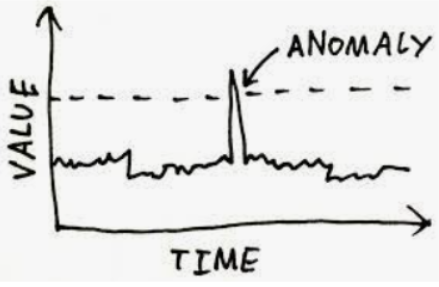

Anomali tespitini nasıl gerçekleştirebiliriz? Tabi ki bunun için bir çok yöntem var ben başlıca yöntemleri ele alacağım. 

Anomali tespiti tekli ve çoklu olmak üzere iki grupta inceleyeceğiz. <br>

**1. Tekli Anomali Tespiti:**  <br>
Değişkenleri teker teker inceleyerek her birindeki anomali durumlarına bakar. Başlıca kullanılan yöntemlerin ikisine bakacak  olursak:<br> <br>
**a) IQR İle Anomali Tespiti** <br>
**b) 3 Sigma Kurali İle Anomali Tespiti** <br> <br> <br>

**2. Çoklu Anomali Tespiti** <br>
    Değişkenleri bir arada değerlendirerek aralarındaki ilşkiye göre anomali durumlarına bakar. Başlıca kullanılan yöntemlerin       ikisine bakacak olursak: <br> <br>
    **a) Local Outlier Factor (LOF)** <br>
    **b) Isolation Forest**

## 1) Tekli Anomali Tespiti

Tekli Anomali Tespiti, bir veri seti üzerinden anlatacak olursak. Veri setindeki herhangi bir nümerik değişkendeki değerlerin **dağılımsal olarak** belli yöntemler dahilinde anomali verileri tespit etmemizi sağlar.

### a) IQR İle Anomali Tespiti

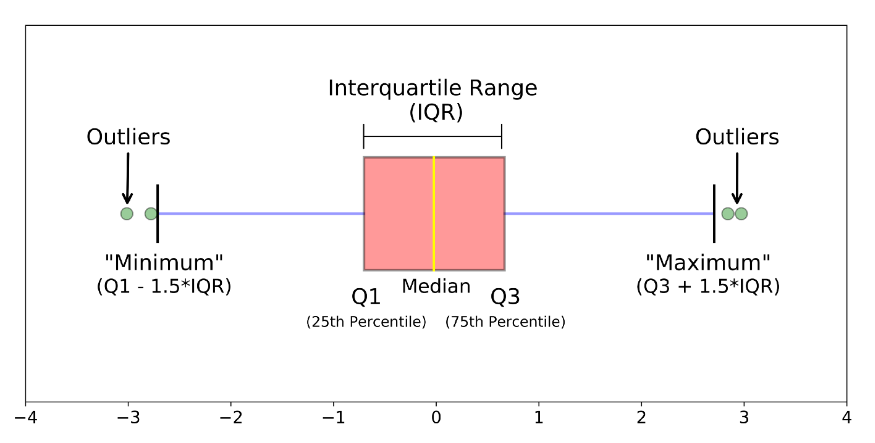
 
Aykırı bulma işleminde yapılan işlemin aynısı gerçekleştirilir. Temel formüllerden bahsetmek gerekirse:

IQR = Q3 - Q1 

Alt sınır = Q1 - 1.5 * IQR

Üst sınır = Q3 + 1.5 * IQR

Üst sınırın üstünde ve alt sınırın altında olan değerler aykırı veya anomali değer olarak kabul edilmektedir. Peki bu formülleri neye göre yazdık biraz bunun üstüne düşelim. 

Biliyoruz ki Gaussian dağılımı şu şekildedir:

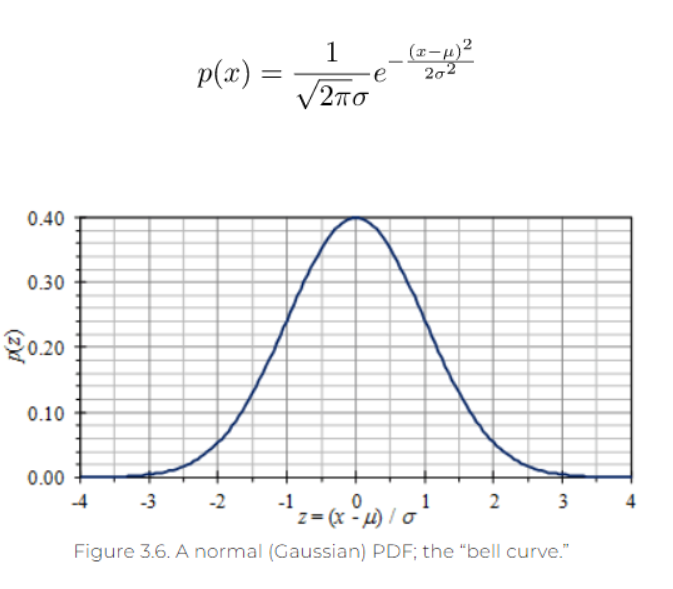


IQR yöntemini kendimizin ürettiği ve dışardan alınan bir veri setinin bir değişkeninde deneyerek neler değiştirdiğini inceleyelim.

Kütüphanelerimizi tanımlayarak başlayalım.

In [2]:
import pandas as pd 
import numpy as np 
import random 
import matplotlib.pyplot as plt 
import seaborn as sns
import anomaly_detection_methods as adm

import warnings 
warnings.filterwarnings('ignore')

`WineQT` adında bir veri seti kullanacağız. Bu veri seti şarapların kalite kontrülü test etmek amacıyla yapılmış bir veri setidir. Tekli anomali analizinde bu veri setinin `chlorides` değişkenini kullanacağız. 

In [3]:
df = pd.read_csv('./WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Anomali değerleri görselleştirerek görelim. Dağılımı gözlemleyelim.

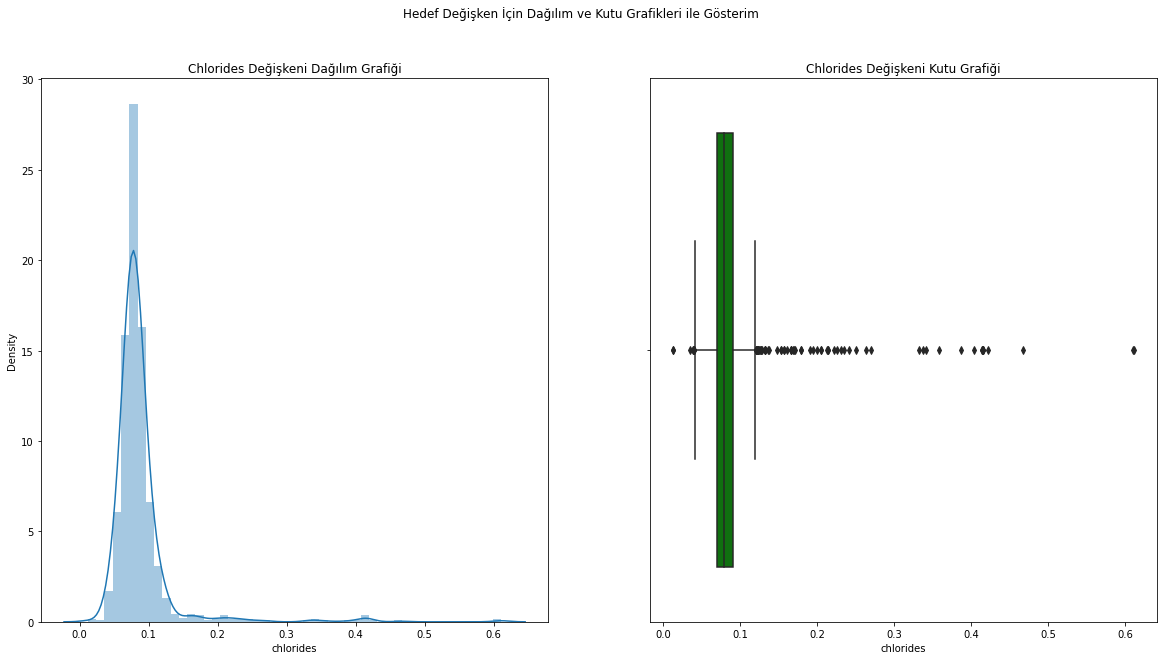

In [11]:
plt.subplots(1,2,figsize = (20,10))
plt.suptitle("Hedef Değişken İçin Dağılım ve Kutu Grafikleri ile Gösterim")

plt.subplot(121)
plt.title("Chlorides Değişkeni Dağılım Grafiği")
sns.distplot(df['chlorides']);

plt.subplot(122)
plt.title("Chlorides Değişkeni Kutu Grafiği")
sns.boxplot(df['chlorides'], color = 'green')
plt.show()

Verinin istatistiksel bilgilerini gösterelim.

In [12]:
data_s = df['chlorides']
data_s.describe()

count    1143.000000
mean        0.086933
std         0.047267
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

Standard Sapma Değerlerini Gösterelim

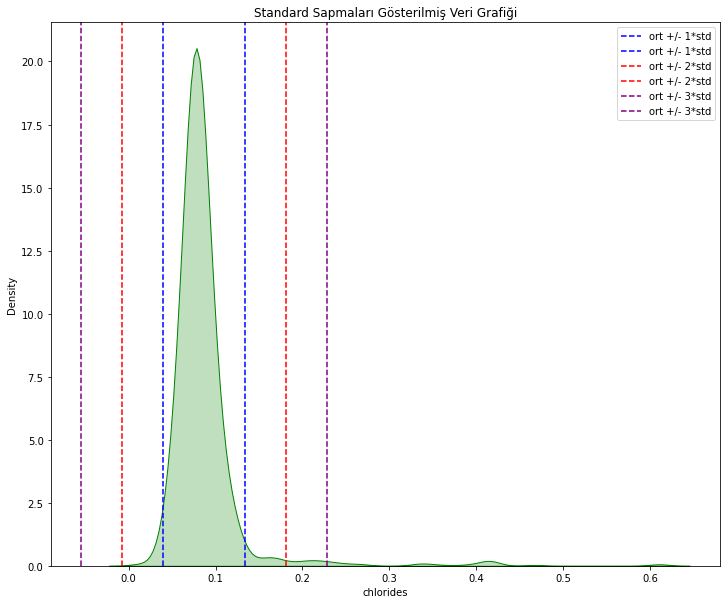

In [68]:
plt.figure(figsize =(12,10))
plt.title("Standard Sapmaları Gösterilmiş Veri Grafiği")
plt.axvline(x = df['chlorides'].std()+ df['chlorides'].mean(), c = "b", linestyle ='--')
plt.axvline(x = -df['chlorides'].std()+ df['chlorides'].mean(), c = "b", linestyle ='--')
plt.axvline(x = 2*df['chlorides'].std()+ df['chlorides'].mean(), c = "r", linestyle ='--')
plt.axvline(x = -2*df['chlorides'].std()+ df['chlorides'].mean(), c = "r", linestyle ='--')
plt.axvline(x = 3*df['chlorides'].std()+ df['chlorides'].mean(), c = "purple", linestyle ='--')
plt.axvline(x = -3*df['chlorides'].std()+ df['chlorides'].mean(), c = "purple", linestyle ='--')
sns.kdeplot(df['chlorides'], fill = True,  color = 'g')
plt.legend(['ort +/- 1*std','ort +/- 1*std','ort +/- 2*std','ort +/- 2*std','ort +/- 3*std','ort +/- 3*std'],loc = 'best')
plt.show();

Şimdi ise verimize IQR ile anomali tespiti işlemini uygulayalım ve alt ve üst sınırlarını belirleyelim.

In [14]:
lower_bound_iqr, upper_bound_iqr = adm.anomaly_detection_with_IQR(df['chlorides'], 1.5)

Anomaly Detection precess with finding IQR started
Cofficent: 1.5
Low Edge: 0.04000000000000002
Upper Edge: 0.11999999999999998
Anomaly detection process with finding IQR finished succesfully.


In [15]:
iqr_anomaly_data =  df[(df['chlorides'] < lower_bound_iqr) | (df['chlorides'] > upper_bound_iqr)]['chlorides'].count()
print("IQR ile Ölçülmüş Anomali Değerler:",iqr_anomaly_data)

IQR ile Ölçülmüş Anomali Değerler: 77


Alt ve üst sınırlarımızı aldığımıza göre bir de dağılım üzerinde görelim.

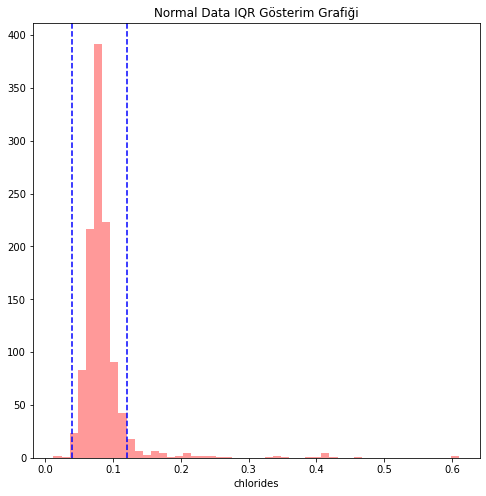

In [109]:
plt.figure(figsize = (8,8))
plt.title("Normal Data IQR Gösterim Grafiği")
plt.axvline(x = lower_bound_iqr, c = "b", linestyle ='--')
plt.axvline(x = upper_bound_iqr, c = "b", linestyle ='--')
sns.distplot(df['chlorides'], kde = False,  color = 'r')
plt.show()

### b) 3 Sigma Kuralı İle Anomali Tespiti

Adından da anlaşılacağı üzere 3 sigma kuralı 3 standart sapma aralığı dışındaki verileri anomali değer olarak kabul eder. 

Bu grafiği standart sapma (𝜎) değerleri üzerinden inceleyecek olursak:

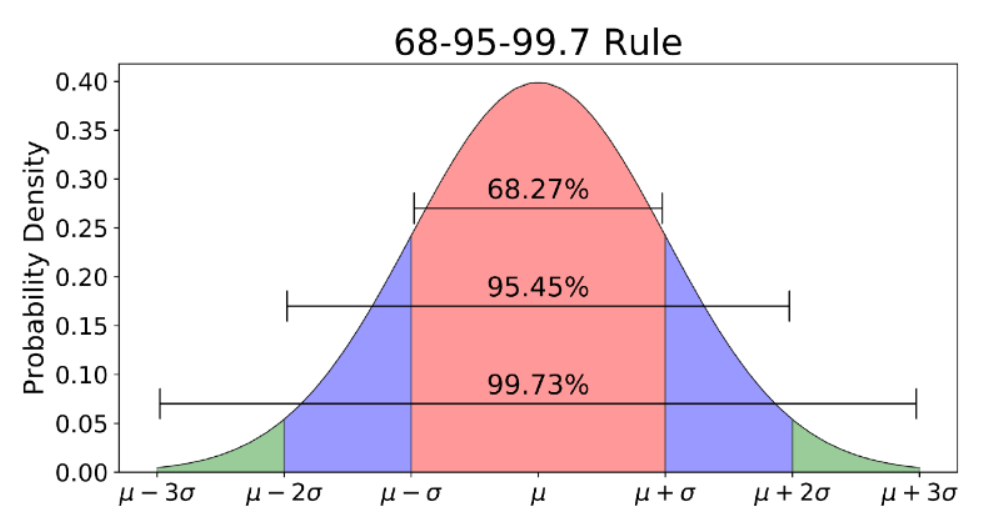

görüldüğü üzere 68-95-99.7 kuralı mevcuttur. Bu kural ilk standart sapma(𝜎) aralığı toplam dağılımın %68'ini, iki standard sapma (2𝜎) aralığı toplam dağılım %95'ini ve üç standart sapma aralığı ise toplam dağılımın %99.7'sini oluşturmaktadır. 
Dağılımda genellikle üç standard sapma aralığı (%97) dışındaki veriler anomali değer varsayılmaktadır. 


3 Sigma Kuralını IQR tarafında kullandığımız veride uygulayalım ve sonuçları gözlemleyelim.

In [16]:
lower_bound_sigma, upper_bound_sigma = adm.three_sigma(df['chlorides'].values)

Three Sigma process started.
Three Sigma precess completed successfully
Low Edge: -0.054807336235643156
Upper Edge: 0.22867260307728793


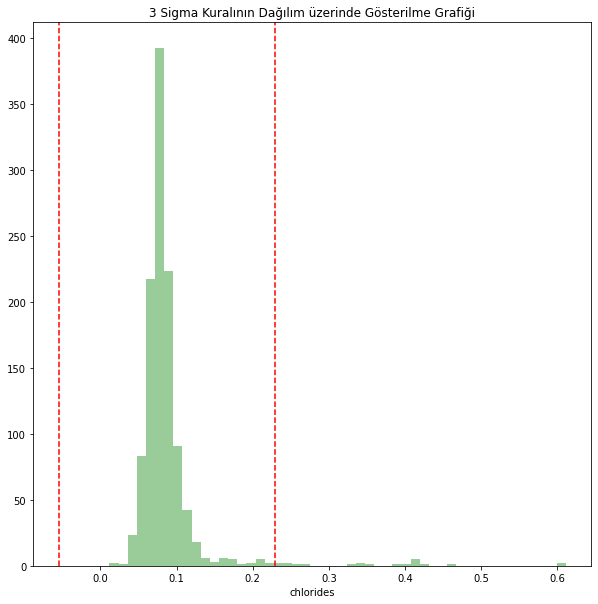

In [85]:
plt.figure(figsize = (10,10))
plt.title("3 Sigma Kuralının Dağılım üzerinde Gösterilme Grafiği")
plt.axvline (x = lower_bound_sigma, linestyle = '--', c = "r")
plt.axvline (x = upper_bound_sigma, linestyle = '--', c = "r")
sns.distplot(df['chlorides'],kde = False, color = 'g')
plt.show();

### IQR ile 3 Sigma Karşılaştırma

In [92]:
comp_df = pd.DataFrame()
comp_df['Values'] = df['chlorides']
comp_df['IQR Anomali'] = 0
comp_df['3 Sigma Anomali'] = 0
comp_df

,Values,IQR Anomali,3 Sigma Anomali
0,0.076,0,0
1,0.098,0,0
2,0.092,0,0
3,0.075,0,0
4,0.076,0,0
...,...,...,...
1138,0.076,0,0
1139,0.068,0,0
1140,0.090,0,0
1141,0.062,0,0


In [96]:
iqr_anomaly_index = df[(df['chlorides'] < lower_bound_iqr) | (df['chlorides'] > upper_bound_iqr)].index
sigma_anomaly_index = df[(df['chlorides'] < lower_bound_sigma) | (df['chlorides'] > upper_bound_sigma)].index

comp_df.loc[iqr_anomaly_index, 'IQR Anomali'] = 1
comp_df.loc[sigma_anomaly_index, '3 Sigma Anomali'] = 1

Görselle göstererek destekleyelim.

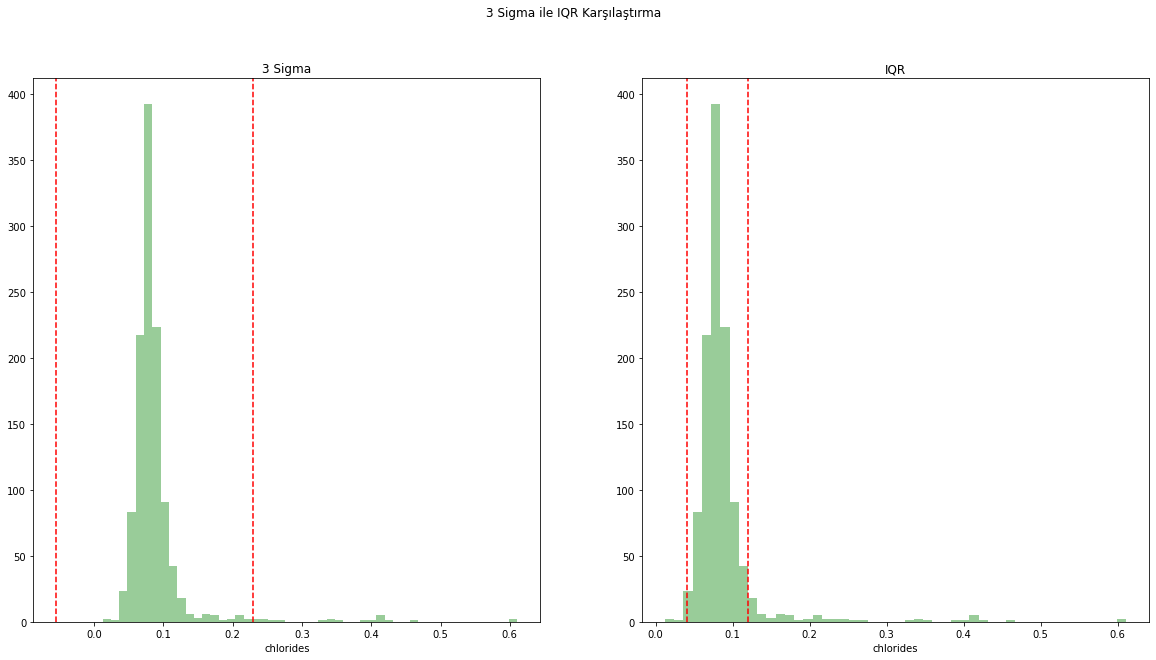

In [114]:
fig,ax = plt.subplots(1,2,figsize = (20,10))
fig.suptitle("3 Sigma ile IQR Karşılaştırma")

plt.subplot(121)
plt.title("3 Sigma")
plt.axvline (x = lower_bound_sigma, linestyle = '--', c = "r")
plt.axvline (x = upper_bound_sigma, linestyle = '--', c = "r")
sns.distplot(df['chlorides'],kde = False, color = 'g')

plt.subplot(122)
plt.title("IQR")
plt.axvline(x = lower_bound_iqr, c = "r", linestyle ='--')
plt.axvline(x = upper_bound_iqr, c = "r", linestyle ='--')
sns.distplot(df['chlorides'], kde = False,  color = 'g')
plt.show()